In [1]:
import math
import pandas as pd
import numpy as np
from plot import *
import random
from pathlib import *

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sk_models import LWKNeighborsRegressor

log_dir = Path("D:/workspace/lazydeep/experiments/")

In [2]:
x= np.asarray([0,math.pi*1/4,math.pi*2/4,math.pi*3/4,math.pi*4/4,math.pi*5/4,math.pi*6/4,math.pi*7/4,math.pi*8/4]).reshape(9,1)
y =[math.sin(i)+np.random.normal(0,0.1) for i in x]

xi = np.linspace(0-1,math.pi*8/4+1,num=1000).reshape(-1,1)
yi = [math.sin(i) for i in xi]
lin1 = LinearRegression().fit(x, y)
knn1 = KNeighborsRegressor(n_neighbors=1).fit(x,y)

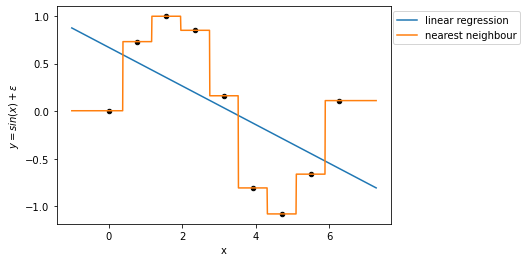

In [3]:
fig, ax = plt.subplots()
ax.scatter(x=x,y=y,s=20,color="black")
ax.plot(xi,lin1.predict(xi),label=f"linear regression") #, r2={r2_score(yi,lin1.predict(xi))}")
ax.plot(xi,knn1.predict(xi),label=f"nearest neighbour")# r2={r2_score(yi,knn1.predict(xi))}")
ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
ax.set_ylabel(r"$y=sin(x)+\epsilon$")
ax.set_xlabel("x")
plt.savefig(log_dir/f"sin_a.png", bbox_inches='tight')

In [4]:
dw0 = KNeighborsRegressor(n_neighbors=9,weights= 'uniform').fit(x,y)
dw2 = KNeighborsRegressor(n_neighbors=9,weights= 'distance').fit(x,y)
dw3 = KNeighborsRegressor(n_neighbors=9,weights= lambda x:1/x**2).fit(x,y)
dw4 = KNeighborsRegressor(n_neighbors=9,weights= lambda i: math.e**(-i*i)  ).fit(x,y)


neighbour_store = LWKNeighborsRegressor(n_neighbors=9).fit(x,y)
distances,indices = neighbour_store.predict(xi)
def triangle_knn(d_,i_):
    y_ = np.asarray(y)[i_]
    d_ = d_/np.max(d_)
    d_ = (1-d_)
    sum_d = np.sum(d_)
    votes = [d_[j]*y_[j] for j in range(0,len(y_))]  
    return np.sum(votes)/sum_d
dw1_preds = [triangle_knn(distances[i],indices[i]) for i in range(0,len(distances))]

    
    

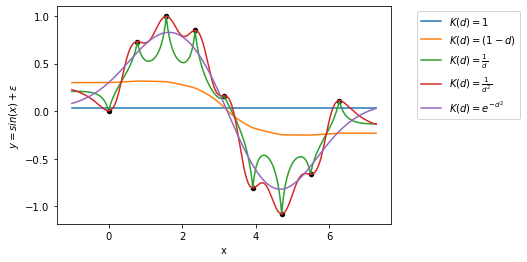

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=x,y=y,s=20,color="black")
ax.plot(xi,dw0.predict(xi),label=r"$K(d)= 1$")
ax.plot(xi,dw1_preds,label=r"$K(d)= (1-d)$")
ax.plot(xi,dw2.predict(xi),label=r"$K(d)= \frac{1}{d}$")
ax.plot(xi,dw3.predict(xi),label=r"$K(d)= \frac{1}{d^2}$")
ax.plot(xi,dw4.predict(xi),label=r"$K(d)= e^{-d^2}$")
ax.set_ylabel(r"$y=sin(x)+\epsilon$")
ax.set_xlabel("x")
ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir/f"sin_b.png", bbox_inches='tight')

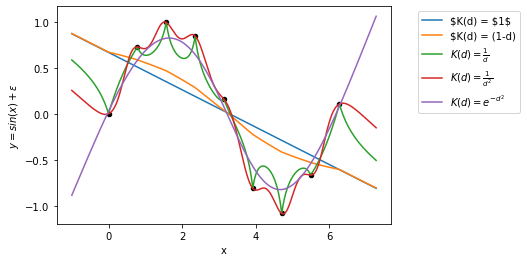

In [7]:
def lwr(x_,kernal_):
    y_= []
    #calculate distances
    for xi_ in x_:
        distances= np.abs(x-xi_)
        kernaled = kernal_(distances)
        total = np.sum(kernaled) 
        lr = LinearRegression().fit(x, y,(kernaled/total).reshape(-1))
        pred = lr.predict([xi_])[0]
        #print(pred)
        y_.append(pred)
    return y_

yi0 = lwr(xi,lambda x:[1 for i in x])
yi1 = lwr(xi,lambda x:(1-x/np.max(x)) )
yi2 = lwr(xi,lambda x:1/x)
yi3 = lwr(xi,lambda x:1/x**2)
yi4 = lwr(xi,lambda i: math.e**(-i*i))

fig, ax = plt.subplots()
ax.scatter(x=x,y=y,s=20,color="black")
ax.plot(xi,yi0,label=r"$K(d) = $1$")
ax.plot(xi,yi1,label=r"$K(d) = (1-d)")
ax.plot(xi,yi2,label=r"$K(d) = \frac{1}{d}$")
ax.plot(xi,yi3,label=r"$K(d) = \frac{1}{d^2}$")
ax.plot(xi,yi4,label=r"$K(d) = e^{-d^2}$")
ax.set_ylabel(r"$y=sin(x)+\epsilon$")
ax.set_xlabel("x")
ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir/f"sin_c.png", bbox_inches='tight')
#lwr1 = KNeighborsRegressor(n_neighbors=9,weights= 'distance').fit(x,y)
#dw2 = KNeighborsRegressor(n_neighbors=9,weights= lambda x:1/x**2).fit(x,y)
#dw3 = KNeighborsRegressor(n_neighbors=9,weights= lambda i: math.e**(-i*i)  ).fit(x,y)